# Descriptive Statistics

## Learning Objectives

- Code summary statistics using NumPy and Pandas: mean, median, mode, max, min, quartile, inter-quartile range, variance, standard deviation, and correlation.
- Create basic data visualizations, including scatter plots, box plots, and histograms.
- Display characteristics and trends in a dataset using visualizations.
- Describe the bias and variance of statistical models.
- Identify a normal distribution within a dataset using summary statistics and data visualizations.

In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
plt.style.use('fivethirtyeight')

# This makes sure that graphs render in your notebook
%matplotlib inline

**Exercise.** Examine the Titanic Data Set

- Use pandas to read in the Titanic data set from ../data/titanic.csv

In [6]:
# /scrub/
titanic = pd.read_csv('../data/titanic.csv')

- Print out the column names.

In [7]:
# /scrub/
titanic.columns

Index(['survived', 'pclass', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked'],
      dtype='object')

- Print out the dimensions of the DataFrame using the `.shape` attribute.

In [8]:
# /scrub/
titanic.shape

(891, 11)

- Print out the data types of the columns using the `.dtypes` attribute.

In [9]:
# /scrub/
titanic.dtypes

survived      int64
pclass        int64
name         object
sex          object
age         float64
sibsp         int64
parch         int64
ticket       object
fare        float64
cabin        object
embarked     object
dtype: object

- Print out the first five rows of the data.

In [10]:
# /scrub/
titanic.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Count the number of occurrences of each value in the `pclass` column.

In [11]:
# /scrub/
titanic.loc[:, 'pclass'].value_counts()

3    491
1    216
2    184
Name: pclass, dtype: int64

- Pull up descriptive statistics for each variable, including categorical variables.

In [12]:
# /scrub/
titanic.describe(include='all')

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
count,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,"Frauenthal, Mrs. Henry William (Clara Heinshei...",male,NaN,NaN,NaN,1601,NaN,B96 B98,S
freq,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


- Which variables have missing values? (Don't confuse missing summary statistics with missing values of the variable!)

/scrub/

Age, cabin, embarked

<a id="descriptive-statistics-fundamentals"></a>
## Descriptive Statistics Fundamentals

### Summation Notation and Python Code

#### Summing a constant

Suppose we wanted to sum the number 4 seven times.

**Notation:**

$$\sum_{i=1}^{7}{4}$$

**Python code:**

In [13]:
# Using base Python `sum`
# /scrub/
sum([4, 4, 4, 4, 4, 4, 4])

28

In [14]:
# Using numpy array .sum() method
# /scrub/
my_array = np.array([4, 4, 4, 4, 4, 4, 4])
my_array.sum()

28

In [15]:
# Building the list using multiplication
# /scrub/
[4] * 7

[4, 4, 4, 4, 4, 4, 4]

**Exercise:** Use a for-loop to build a list of seven 4s.

In [16]:
# /scrub/
fours = []
for i in range(7):
    fours.append(7)

---

In [17]:
# More compact approach: a list comprehension
# /scrub/
fours = [4 for number in range(7)]
fours

[4, 4, 4, 4, 4, 4, 4]

General notation for the sum of a constant $k$, $n$ times:
$$\sum_{i=1}^nk$$

#### Summing consecutive integers

The sum of all numbers from 1 up to and including $10:

$$\sum_{i=1}^{10}i$$

**Exercise.**

- Use a list comprehension to create a list of all numbers from one to ten.

In [18]:
# /scrub/
my_nums = [num for num in range(1, 11)]
my_nums

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

- Turn this list into a `numpy` array and use that array's `.sum` method to calculate its sum. (You should get `55`.)

In [19]:
# /scrub/
np.array(my_nums).sum()

55

#### Summing elements of an arbitrary sequence

The sum of all $x$ from the first $x$ entry to the $n$th $x$ entry:
$$\sum_{i=0}^nx_i$$

In [20]:
# Use the "fare" column of the `titanic` dataframe to compute the total fare paid by passengers
# /scrub/
titanic.loc[:, 'fare'].sum()

28693.9493

**Exercise.** Calculate the sum of the ages of the Titanic passengers.

In [21]:
# /scrub/

titanic.loc[:, 'age'].sum()

21205.17

#### Takeaways

- Mathematicians use $\Sigma$ ("capital sigma") to denote a sum.
- A list comprehension is a compact way to create a list using a `for` loop.
- NumPy arrays and Pandas series have `.sum` methods.

<a id="measures-of-central-tendency"></a>
### Measures of Central Tendency

- Mean
- Median
- Mode

#### Mean
The **mean** (average) of a set of numbers is their sum divided by their count:
$$\bar{X} =\frac 1n\sum_{i=1}^nx_i$$

#### Median
The median refers to the midpoint in a series of numbers:

$$ 0,1,2,[3],5,5,1004 $$

$$ 1,3,4,[4,5],5,5,7 $$

To find the median:

- Arrange the numbers in order from smallest to largest.
    - If there is an odd number of values, the middle value is the median.
    - If there is an even number of values, the average of the middle two values is the median.

#### Mode
The mode of a set of values is the value that occurs most often.
A set of values may have more than one mode, or no mode at all.

$$1,0,1,5,7,8,9,3,4,1$$ 

$1$ is the mode, as it occurs the most often (three times).

**Exercise.**

- Calculate the mean, median, and mode for each of the following sets of numbers "by hand." (You may use Python's `+` and `/` operators, but no higher-level functions/methods.)

75, 87, 49, 68, 75, 84, 94

In [2]:
# /scrub/
# Mean
(75 + 87 + 49 + 68 + 75 + 84 + 94) / 7

76.0

/scrub/

**Median**

49, 68, 75, [75], 84, 87, 94

75

**Mode**

75

- Calculate the mean, median, and mode for each of the following sets of numbers "by hand."

1, 1, 2, 3, 4, 5, 6, 7, 8, 1000

In [3]:
# /scrub/
# Mean
(1 + 1 + 2 + 3 + 4 + 5 + 6 + 6 + 8 + 1000) / 10

103.6

/scrub/

**Median**

1, 1, 2, 3, [4, 5], 6, 6, 8, 1000

4.5

**Mode**

1

- For previous list of numbers, which "measure of central tendency" best captures the intuitive idea of a "typical" value in the set? Why do the others return "atypical" values?

/scrub/

The median (4.5) is the most typical value. The outlier value 1000 has a large effect on the mean, but it does not affect the median any more than any other value greater than 4.5. The mode isn't very meaningful when we have little repetition.

When the distribution of values is nice and symmetric, the mean, median, and mode are about the same. When it is **skewed**, meaning that you have more values far from the center in one direction or the other, the mean gets pulled toward the skew more than the median, which gets pulled more than the mode.

![](../assets/images/skewness_and_central_tendency.png)

- If you are worried about outliers in a data set throwing off your results for the typical case, would you use methods based on the mean or the median?

/scrub/

Use the median rather than the mean to make your method more resistant to outliers.

#### Measures of Central Tendency in Pandas

In [20]:
# Use pandas to find the mean of the titanic.fare series
# /scrub/
titanic.loc[:, 'fare'].mean()

32.2042079685746

In [21]:
# Use pandas to find the median of the titanic.fare series
# /scrub/
titanic.loc[:, 'fare'].median()

14.4542

In [22]:
# Use pandas to find the mode of the titanic.fare series
# /scrub/
titanic.loc[:, 'fare'].mode()

0    8.05
dtype: float64

**Exercise.** The mean, median, and more are quite different in this case. What does that tell you about fares on the Titanic?

/scrub/

The distribution of fares is skewed. That makes sense: the majority of people ride third class, so the mode is the third-class price; the "typical," "middle" passenger rides second class, so the median is the second-class price; and first-class tickets are much more expensive than second- or third-class tickets, so they have a lot of influence on the mean.

<a id="measures-of-dispersion-standard-deviation-and-variance"></a>
### Measures of Dispersion: Standard Deviation and Variance

![](../assets/images/variance_magnitude.png)

#### Definitions

- The **sample variance** of a data set is the average squared distance of each point from the mean, except that we divide by $n-1$ instead of $n$: $\frac{1}{n-1}\sum (X - \bar{X})^2$. (We divide by $n-1$ to make sample variance an "unbiased estimator" of true variance.)
- The **sample standard deviation** is the square root of the sample variance: $\sqrt{\frac{1}{n-1}\sum (X - \bar{X})^2}$
- The **sample standard error** of an estimator is an estimate of its precision.

#### Notes

- You can think of sample variance/standard deviation as an estimate of the true variance/standard deviation of your variable, and of sample standard error as an estimate of the true standard error of your estimator.
- Standard deviation is more interpretable than variance because it is on the same scale as the original data. (The square root "undoes" the squaring.)

**Exercise.** As sample size increases, estimators gets more precise, but the underlying distribution does not change. So what happens to the following quantities?

- variance (i.e., the true variance of the population)

/scrub/

Does not change

- sample variance

/scrub/

Bounces around but does not change on average

- standard deviation

/scrub/

Does not change

- sample standard deviation

/scrub/

Bounces around but does not change on average.

- standard error

/scrub/

Decreases

#### Calculating Sample Variance and Standard Deviation

In [37]:
# Take the first 5 rows of Titanic age data
first_five = titanic.loc[:4, 'age']

first_five

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

😱

**Exercise.**

- Use a built-in Pandas method to get the first five rows of the Titanic data. Then select the age column.

In [39]:
# /scrub/
titanic.head().loc[:, 'age']

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: age, dtype: float64

- **Challenge:** Why doesn't `.loc.` use the usual "up-to-but-not-including" Python convention for ranges?

/scrub/

`.loc` is based on labels rather than positions. Those labels are not necessarily consecutive integers. In the case of column names, for instance, if you want all of the columns up to and including `age`, it is more natural to use `titanic.loc[:, :'age']` than to refer to the **next column**.

---

In [33]:
# Calculate the mean "by hand"
# /scrub/
mean = (22 + 38 + 26 + 35 + 35) / 5.0
mean

31.2

In [34]:
# Calcualte the variance "by hand"
# /scrub/
variance = (np.square(22 - mean)
            + np.square(38 - mean)
            + np.square(26 - mean)
            + np.square(35 - mean)
            + np.square(35 - mean)) / 4.0
variance

46.699999999999996

In [35]:
# Calculate the standard deviation "by hand"
# /scrub/
np.sqrt(46.699999)

6.833739752141575

In [36]:
# Calculate the mean, variance, and standard deviation using Pandas
# /scrub/
print(first_five.mean())
print(first_five.var())
print(first_five.std())

31.2
46.699999999999996
6.833739825307955


<a id="our-first-model"></a>
## Our First Model
---

A statistical model is like a model car: it doesn't capture everything about its target, but it tries to capture what we care about for some purpose.

E.g. a model to predict lung cancer might use age and smoking history.

As an extremely simple model that we can use as a baseline, we can just use the mean of a variable to predict its value in a particular case.

In [40]:
# Get the `fare` column from the Titanic data and store it in variable `y`
# /scrub/
y = titanic.loc[:, 'fare']

In [41]:
# Create predictions y_pred (in this case just the mean of `y`)
# /scrub/
y_pred = y.mean()

In [42]:
# Find the average squared distance between each prediction and its actual value
# /scrub/
mse = np.mean(np.square(y-y_pred))
mse

2466.6653116850434

This quantity is called "mean squared error" (MSE).

**Exercise.** The mean squared error is essentially equal to what descriptive statistic when our prediction is the mean? (Why only "essentially" equal?)

/scrub/

It is the sample variance dividing by $n$ instead of $n-1$.

---

In [45]:
# Calculate the root mean squared error (RMSE), the square root of the MSE
# /scrub/
rmse = np.sqrt(mse)
rmse

49.66553444477411

<a id="a-short-introduction-to-model-bias-and-variance"></a>
## A Short Introduction to Model Bias and Variance 

- Model **bias** is systematic error that won't go away no matter how much data you collect.
- Model **variance** is random error that will fade away as you collect more data (and refit the model).
- What you should do next to improve your model depends on whether it has more of a bias problem or more of a variance model.

/scrub/

[iPad/board]

![](../assets/images/bias_variance.png)

- Red has high bias -- more data will let you hone in on the best possible line, but you'll still have a lot of error.
- Purple has high variance -- with enough data it will catch on to what's really going on, but right now it's chasing the individual data points around. It has low error on these points, but it probably wouldn't do well on new data.
- Green strikes a good balance.

<a id="correlation-and-association"></a>
## Correlation and Association

The magnitude of the **(Pearson) correlation coefficient** for a pair of variables measures how well you could predict one as a linear function of the other; its sign indicates whether the tend to move in the same direction or in opposite directions.

![Example correlation values](../assets/images/correlation_examples.png)

**Exercise.** Based on the characterization of the correlation coefficient given above, why is its value 0 in the third row even though the two variables are clearly related?

/scrub/

The Pearson correlation coefficient only reflects a *linear* relationship.

<a id="codealong-correlation-in-pandas"></a>
## Correlation in Pandas

In [46]:
# Display the correlation matrix for all Titanic variables
# /scrub/
titanic.corr()

,survived,pclass,age,sibsp,parch,fare
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


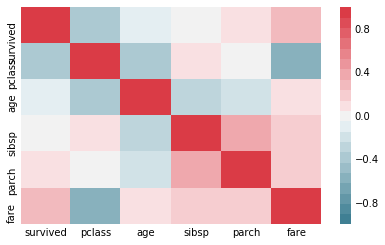

In [49]:
# Use Seaborn to plot a heat map of the correlation matrix
# /scrub/
fig, ax = plt.subplots()
sns.heatmap(titanic.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(220, 10, n=21), ax=ax);

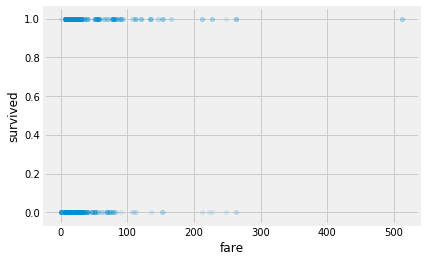

In [52]:
# Take a closer look at survived and fare using a scatter plot
# /scrub/
fig, ax = plt.subplots()
titanic.plot.scatter(x='fare', y='survived', alpha=.1, ax=ax);

<a id="the-normal-distribution"></a>
## The Normal Distribution

### What is the Normal Distribution?

![](../assets/images/normal_distribution.png)

Symmetric "Bell curve"

![](../assets/images/normal_std.png)

#### Why do we care?

- Aggregated processes are distributed normally, regardless of their underlying distributions, as long as they aren't too correlated (central limit theorem). As a result, they show up a lot.
- They have some nice mathematical properties.
- Many models (e.g. linear regression) are designed for normally distributed data.

#### Plot a histogram of 1,000 samples from a random normal distribution:

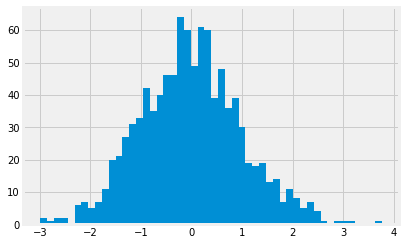

In [56]:
# /scrub/
data = np.random.randn(1000)

fig, ax = plt.subplots()
ax.hist(data, bins=50);

<a id="skewness"></a>
###  Skewness
- Skewness is a measure of the asymmetry of the distribution of a random variable about its mean.
- Skewness can be positive or negative, or even undefined.
- Notice that the mean, median, and mode are the same when there is no skew.

![skewness](../assets/images/skewness---mean-median-mode.jpg)

#### Plot a lognormal distribution generated with NumPy.

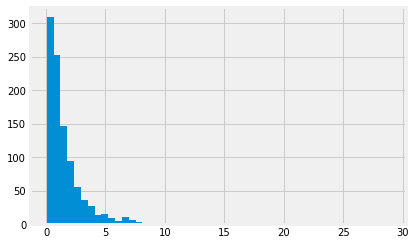

In [57]:
# Plot a lognormal distribution generated with NumPy
# /scrub/
data = np.random.lognormal(size=1000)

fig, ax = plt.subplots()
ax.hist(data, bins=50);

Many algorithms rely on the mean being "typical." With skewed data, you may have to transform your data or set your algorithms to work with the median.

<a id="determining-the-distribution-of-your-data"></a>
## Determining the Distribution of Your Data

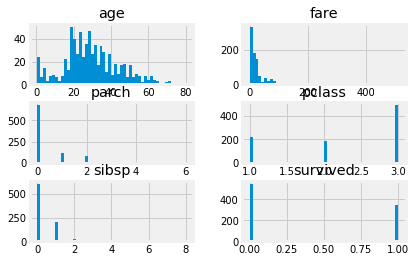

In [66]:
# Plot all variables in titanic using histograms
# /scrub/
fig, ax = plt.subplots(nrows=3, ncols=2)
titanic.hist(figsize=(10, 8), bins=50, ax=ax);

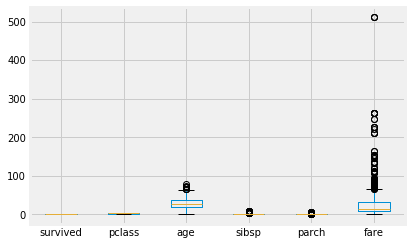

In [67]:
# Create boxplots of the variables.
# /scrub/
fig, ax = plt.subplots()
titanic.plot.box(ax=ax);

The box encloses the middle 50% of the values. The whiskers extend out to the min and max, except that points more than 1.5 times as far from the median as the size of the box are considered "outliers" and plotted as individual points.

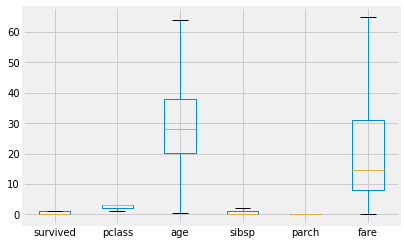

In [64]:
# Use showfliers=False to omit "outliers"
# /scrub/
titanic.plot.box(showfliers=False)

<a id="exercise"></a>
**Exercise.**

Which Titanic variables are normal? Which are skewed? How does these characteristics affect our data modeling?

/scrub/

- Fare has a strong positive skew.
- Age is interesting. The bulk of the distribution has a positive skew, but there are many very young children. I wonder if there is a data quality issue that is affecting the reported ages under 20.
- The other variables are categorical, so normal/skewed doesn't apply.

A method that relies on normality might be OK for age; definitely not for fare.

<a id="topic-review"></a>
## Lesson Review
---

1. We covered several different types of summary statistics, what are they?
- We covered three different types of visualizations, which ones?
- Describe bias and variance and why they are important.
- What are some important characteristics of distributions?

/scrub/

1. Measures of central tendency, measures of dispersion, meaures of association
- Histograms, correlation plots, boxplots
- Model bias is systematic error that won't go away no matter how much data you have. Model variance is random error that goes away as the size of the data set increases. The distinction is important because what you should do next to improve your model depends primarily on whether it has more of a bias problem or more of a variance problem.
- Normal/non-normal, mean, variance, skewness.

# Questions?

# [Exit Tickets](https://docs.google.com/forms/d/e/1FAIpQLSfvZxGW3CHmZzIhNqz-5uzMeDTQHHDOH8G2ovTPbT5U6Q8KLA/viewform?usp=send_form)